In [1]:
# ! pip install flair
# ! pip install emoji

In [1]:
import pandas as pd

import re
import string

import emoji

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('average_perception_tagger')
# nltk.download('wordnet')
# nltk.download('words') # if its needed

from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tweet_data = pd.read_csv('clim_dat2.csv')
tweet_data.head()

,Unnamed: 0,text,created_at,day,weekday,hour,latitude,longitude,country_code,location,bounding_box,screen_name,name,statuses_count,reply_count,retweeted,is_quote_status,user_mentions,hashtags
0,10125,"@ScotTories No, the climate emergency ""threate...",2021-06-01 00:30:43,1,1,0,NaN,NaN,GB,"Dundee, Scotland","[[[-3.07452, 56.451371], [-3.07452, 56.502533]...",TheRedBusher,Rua B #DisolveTheUnion #IndyRef2,1734,0,False,False,['ScotTories'],[]
1,22560,#stopthechop #savetheavenue #ClimateAction thi...,2021-06-01 04:21:32,1,1,4,NaN,NaN,GB,Staunton Country Park,"[[[-0.975829, 50.873893], [-0.975829, 50.87389...",stop_chop,Stop the Chop!🌳🌿🍃,48,0,False,False,[],"['stopthechop', 'savetheavenue', 'ClimateAction']"
2,37825,@nightranger66 @MerielMyers The climate crisis...,2021-06-01 05:48:36,1,1,5,NaN,NaN,GB,"Biddulph, England","[[[-2.194294, 53.092324], [-2.194294, 53.13345...",Therapod1,Simon (⧖),9819,0,False,False,"['nightranger66', 'MerielMyers']",[]
3,43759,I expect Anne Boleyn will launch into a monolo...,2021-06-01 06:11:26,1,1,6,NaN,NaN,GB,"Walsall, England","[[[-2.068054, 52.551586], [-2.068054, 52.64093...",Mr_W_Carpenter,Will Carpenter,74545,0,False,True,[],[]
4,52434,The world is facing an $8.1trn financing gap i...,2021-06-01 06:41:10,1,1,6,NaN,NaN,GB,"Camberwell, London","[[[-0.111476, 51.419425], [-0.111476, 51.50994...",KajEmbren,Kaj Embren,47074,0,False,False,[],[]


In [3]:
tweet_data = tweet_data.drop_duplicates()
# tweet_data = tweet_data[tweet_data['tweet_id'] != 'tweet_id']
tweet_data.shape

(3096, 19)

In [4]:
tweet_data = tweet_data.rename(columns={'text':'tweet'})

In [5]:
df_clean = tweet_data.copy()

# make all tweet text lower case 
df_clean['clean'] = df_clean.tweet.str.lower()

# remove any links from tweets 
df_clean.clean = df_clean.clean.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))

# remove mentions of other twitter users
df_clean.clean = df_clean.clean.apply(lambda x: re.sub(r'@\S+', '', x))

# remove html reference 
df_clean.clean = df_clean.clean.apply(lambda x: re.sub(r'&amp\S+', '', x))

# remove new line 
df_clean.clean = df_clean.clean.apply(lambda x: re.sub(r'\n', ' ', x))

# remove any emojis
df_clean.clean = df_clean.clean.apply(lambda x: emoji.replace_emoji(x, replace=''))

In [6]:
# extract hashtags from tweet before removing punctuation 
df_clean['hashtags2'] = df_clean.clean.apply(lambda x: [word for word in x.split(' ') if word.startswith('#')])

In [22]:
# # removes most punctuation
df_clean.clean = df_clean.clean.apply(lambda x: re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', x))

# remove white space 
df_clean.clean = df_clean.clean.apply(lambda x: x.strip())
df_clean.clean = df_clean.clean.apply(lambda x: ' '.join(x.split()))

In [23]:
tweet_data.columns

Index(['Unnamed: 0', 'tweet', 'created_at', 'day', 'weekday', 'hour',
       'latitude', 'longitude', 'country_code', 'location', 'bounding_box',
       'screen_name', 'name', 'statuses_count', 'reply_count', 'retweeted',
       'is_quote_status', 'user_mentions', 'hashtags'],
      dtype='object')

### Remove stop words

In [24]:
df_clean.clean = df_clean.clean.apply(lambda x: ' '.join([word for word in x.split(' ') if word not in stopwords.words('english')]))
df_clean.head()

,Unnamed: 0,tweet,created_at,day,weekday,hour,latitude,longitude,country_code,location,...,screen_name,name,statuses_count,reply_count,retweeted,is_quote_status,user_mentions,hashtags,clean,hashtags2
0,10125,ScotTories No the climate emergency threate...,2021-06-01 00:30:43,1,1,0,NaN,NaN,GB,"Dundee, Scotland",...,TheRedBusher,Rua B #DisolveTheUnion #IndyRef2,1734,0,False,False,['ScotTories'],[],climate emergency threatens call oil gas indus...,[]
1,22560,stopthechop savetheavenue ClimateAction thi...,2021-06-01 04:21:32,1,1,4,NaN,NaN,GB,Staunton Country Park,...,stop_chop,Stop the Chop!🌳🌿🍃,48,0,False,False,[],"['stopthechop', 'savetheavenue', 'ClimateAction']",stopthechop savetheavenue climateaction beauti...,"[#stopthechop, #savetheavenue, #climateaction]"
2,37825,nightranger66 MerielMyers The climate crisis...,2021-06-01 05:48:36,1,1,5,NaN,NaN,GB,"Biddulph, England",...,Therapod1,Simon (⧖),9819,0,False,False,"['nightranger66', 'MerielMyers']",[],climate crisis though would coherent min prep,[]
3,43759,I expect Anne Boleyn will launch into a monolo...,2021-06-01 06:11:26,1,1,6,NaN,NaN,GB,"Walsall, England",...,Mr_W_Carpenter,Will Carpenter,74545,0,False,True,[],[],expect anne boleyn launch monologue climate ch...,[]
4,52434,The world is facing an 8 1trn financing gap i...,2021-06-01 06:41:10,1,1,6,NaN,NaN,GB,"Camberwell, London",...,KajEmbren,Kaj Embren,47074,0,False,False,[],[],world facing 8 1trn financing gap nature help ...,[]


### Lemmatize

The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.
Lemmatisation is closely related to stemming. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech. However, stemmers are typically easier to implement and run faster, and the reduced accuracy may not matter for some applications.

In [25]:
lemmatizer = WordNetLemmatizer()
df_clean.clean = df_clean.clean.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split(' ')]))
df_clean.head()

,Unnamed: 0,tweet,created_at,day,weekday,hour,latitude,longitude,country_code,location,...,screen_name,name,statuses_count,reply_count,retweeted,is_quote_status,user_mentions,hashtags,clean,hashtags2
0,10125,ScotTories No the climate emergency threate...,2021-06-01 00:30:43,1,1,0,NaN,NaN,GB,"Dundee, Scotland",...,TheRedBusher,Rua B #DisolveTheUnion #IndyRef2,1734,0,False,False,['ScotTories'],[],climate emergency threatens call oil gas indus...,[]
1,22560,stopthechop savetheavenue ClimateAction thi...,2021-06-01 04:21:32,1,1,4,NaN,NaN,GB,Staunton Country Park,...,stop_chop,Stop the Chop!🌳🌿🍃,48,0,False,False,[],"['stopthechop', 'savetheavenue', 'ClimateAction']",stopthechop savetheavenue climateaction beauti...,"[#stopthechop, #savetheavenue, #climateaction]"
2,37825,nightranger66 MerielMyers The climate crisis...,2021-06-01 05:48:36,1,1,5,NaN,NaN,GB,"Biddulph, England",...,Therapod1,Simon (⧖),9819,0,False,False,"['nightranger66', 'MerielMyers']",[],climate crisis though would coherent min prep,[]
3,43759,I expect Anne Boleyn will launch into a monolo...,2021-06-01 06:11:26,1,1,6,NaN,NaN,GB,"Walsall, England",...,Mr_W_Carpenter,Will Carpenter,74545,0,False,True,[],[],expect anne boleyn launch monologue climate ch...,[]
4,52434,The world is facing an 8 1trn financing gap i...,2021-06-01 06:41:10,1,1,6,NaN,NaN,GB,"Camberwell, London",...,KajEmbren,Kaj Embren,47074,0,False,False,[],[],world facing 8 1trn financing gap nature help ...,[]


### Frequently used words

In [26]:
for tweet in df_clean.clean[:10]:
    print(tweet)

climate emergency threatens call oil gas industry therefore need tr…
stopthechop savetheavenue climateaction beautiful avenue lost havant borough council approve the…
climate crisis though would coherent min prep
expect anne boleyn launch monologue climate change civil right waiting axema…
world facing 8 1trn financing gap nature help combat climate crisis ecological breakdown…
sir mark rylance called art help solve climate crisis telling story persuade people to…
soil erosion greater immediate threat climate change funnily enough also happens be…
well rapid drastic cut greenhouse gas emission combat climatechange government need plan ca…
haha don’t silly time everyone we…
forgotten much fun good old fashioned cold horrific cough match current climate doe…


In [27]:
nltk.word_tokenize(df_clean.clean[0])

['climate',
 'emergency',
 'threatens',
 'call',
 'oil',
 'gas',
 'industry',
 'therefore',
 'need',
 'tr…']

In [28]:
word_freq = defaultdict(int)
for sent in df_clean.clean:
    sent = sent.split(' ')
    for i in sent:
        word_freq[i] += 1
len(word_freq)

6287

In [29]:
for word in sorted(word_freq, key=word_freq.get, reverse=True)[:20]:
    print(word, word_freq[word])

climate 2008
war 933
change 621
corona 507
imam 485
surely 466
disaster 465
intensify 462
nasser 451
… 447
mahdi 444
al 443
mohammad 433
yemeni 425
21 406
ramadan 364
coronaclimatewarcalamity 329
crisis 168
wimbledon 142
cornwall 103


In [55]:
from gensim.models.phrases import Phrases, Phraser

sent = [row.split() for row in df_clean['clean']]
phrases = Phrases(sent, min_count=30, progress_per=100)
sentences = Phraser(phrases)[sent]

word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

sorted(word_freq, key=word_freq.get, reverse=True)[:30]

['climate',
 'change',
 'war',
 'disaster_corona',
 'war_surely',
 'intensify_imam',
 'mahdi_nasser',
 'mohammad_al',
 'yemeni_21',
 'ramadan_…',
 'crisis',
 'coronaclimatewarcalamity_wimbledon',
 'coronaclimatewarcalamity',
 'cornwall',
 'g7',
 'climatecrisis',
 'action',
 'uk',
 'climateemergency',
 '…',
 'الله',
 'need',
 'world',
 'climateaction',
 'climatechange',
 'la',
 'it’s',
 'u',
 'emergency',
 'year']

### Frequently used hashtags

In [30]:
all_hashtags = sum([tag.split('#') for tag in df_clean['hashtags2'].sum()], [])
all_hashtags = [tag for tag in all_hashtags if tag]  # removes empty strings from splitting hashtags

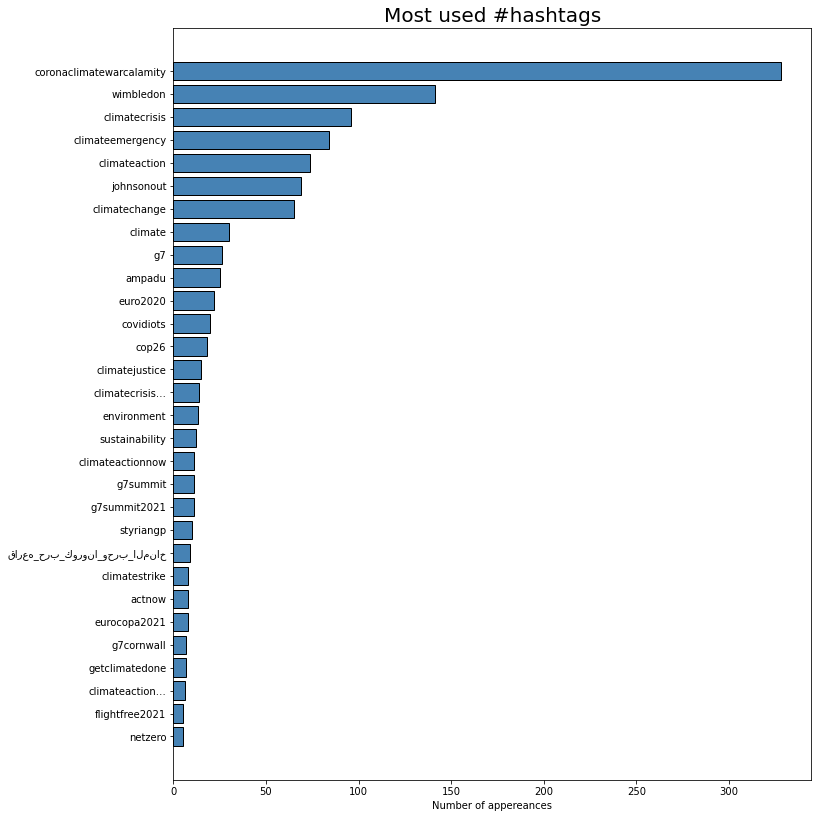

In [31]:
top_hashtags = Counter(all_hashtags).most_common(30)
top_tags = [x[0] for x in top_hashtags]
top_tags_freq = [x[1] for x in top_hashtags]

fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(top_tags))
ax.barh(y_pos ,list(top_tags_freq)[::-1], align='center', color='steelblue', edgecolor='black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(top_tags)[::-1])
ax.set_xlabel("Number of appereances")
ax.set_title("Most used #hashtags", fontsize = 20)
plt.tight_layout(pad=3)

### Sentiment model using flair 

In [18]:
from flair.models import TextClassifier
from flair.data import Sentence
sia = TextClassifier.load('en-sentiment')

2022-08-03 12:57:33,822 loading file /Users/hannahbrown/.flair/models/sentiment-en-mix-distillbert_4.pt


In [22]:
df_clean = df_clean[df_clean["clean"]!='']

In [23]:
def flair_prediction(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return "pos"
    elif "NEGATIVE" in str(score):
        return "neg"
    else:
        return "neu"
sent = df_clean["clean"].apply(flair_prediction)

In [ ]:
# for i, tweet in enumerate(df_clean['tweet'][:100][sent=='pos']): 
#     print(i, tweet)

In [24]:
df_clean['sentiment'] = sent

In [26]:
df_clean['created_at'] = pd.to_datetime(df_clean['created_at'], format="%Y-%m-%d %H:%M:%S")
df_clean = df_clean.set_index('created_at')

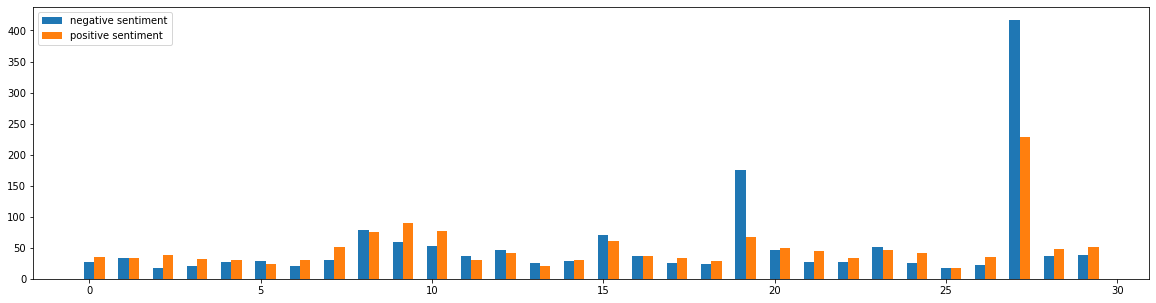

In [27]:
width = 0.3
pos = df_clean[df_clean['sentiment']=='pos'].resample('D').agg('count')['tweet']
neg = df_clean[df_clean['sentiment']=='neg'].resample('D').agg('count')['tweet']
plt.bar(np.arange(len(neg)), neg, width=width,label='negative sentiment')
plt.bar(np.arange(len(pos))+width, pos, width=width, label='positive sentiment')
plt.legend()
plt.gcf().set_size_inches(20,5)

In [28]:
# what are the top 5 most used hashtags on each day? Do these say much about what was happening on those days? 

In [29]:
df_clean[df_clean['sentiment']=='neg'].resample('D').agg('count')['tweet']

created_at
2021-06-01     27
2021-06-02     34
2021-06-03     18
2021-06-04     21
2021-06-05     27
2021-06-06     29
2021-06-07     21
2021-06-08     31
2021-06-09     79
2021-06-10     59
2021-06-11     53
2021-06-12     36
2021-06-13     47
2021-06-14     25
2021-06-15     29
2021-06-16     71
2021-06-17     37
2021-06-18     26
2021-06-19     24
2021-06-20    175
2021-06-21     46
2021-06-22     27
2021-06-23     27
2021-06-24     51
2021-06-25     26
2021-06-26     18
2021-06-27     23
2021-06-28    417
2021-06-29     36
2021-06-30     38
Freq: D, Name: tweet, dtype: int64

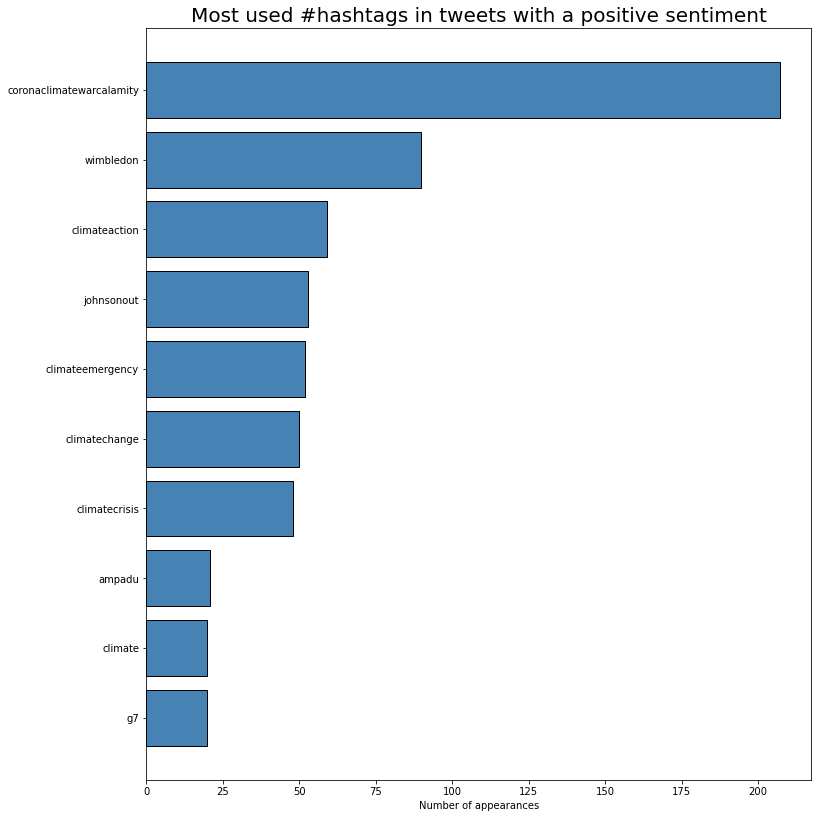

In [30]:
all_hashtags = sum([tag.split('#') for tag in df_clean[df_clean['sentiment']=='pos']['hashtags2'].sum()], [])
all_hashtags = [tag for tag in all_hashtags if tag]  # removes empty strings from splitting hashtags

top_hashtags = Counter(all_hashtags).most_common(10)
top_tags = [x[0] for x in top_hashtags]
top_tags_freq = [x[1] for x in top_hashtags]

fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(top_tags))
ax.barh(y_pos ,list(top_tags_freq)[::-1], align='center', color='steelblue', edgecolor='black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(top_tags)[::-1])
ax.set_xlabel("Number of appearances")
ax.set_title("Most used #hashtags in tweets with a positive sentiment", fontsize = 20)
plt.tight_layout(pad=3)

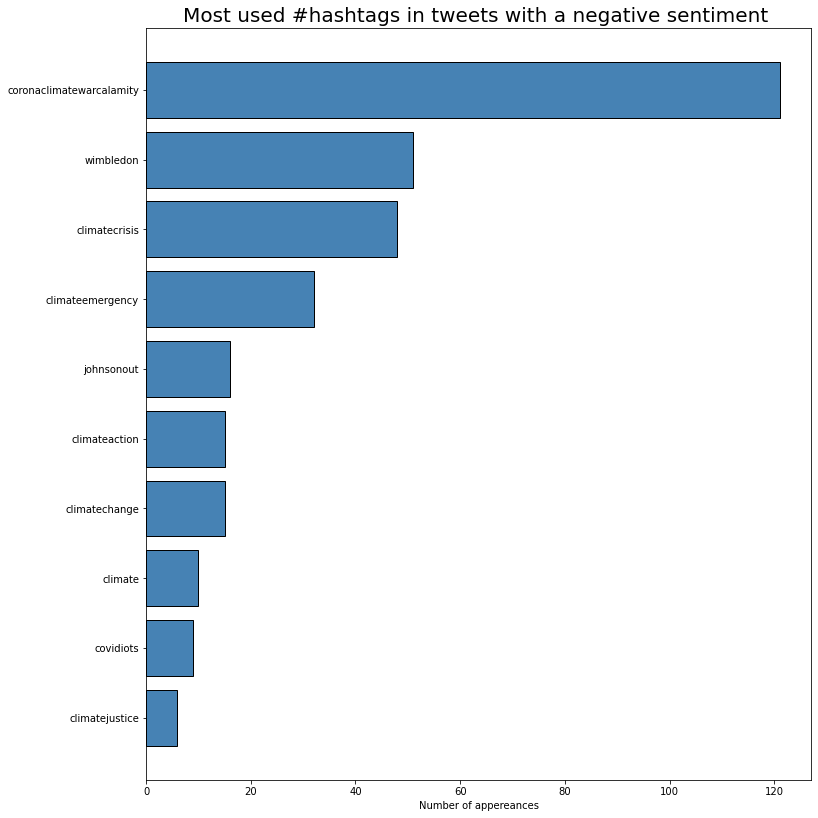

In [31]:
all_hashtags = sum([tag.split('#') for tag in df_clean[df_clean['sentiment']=='neg']['hashtags2'].sum()], [])
all_hashtags = [tag for tag in all_hashtags if tag]  # removes empty strings from splitting hashtags

top_hashtags = Counter(all_hashtags).most_common(10)
top_tags = [x[0] for x in top_hashtags]
top_tags_freq = [x[1] for x in top_hashtags]

fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(top_tags))
ax.barh(y_pos ,list(top_tags_freq)[::-1], align='center', color='steelblue', edgecolor='black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(top_tags)[::-1])
ax.set_xlabel("Number of appereances")
ax.set_title("Most used #hashtags in tweets with a negative sentiment ", fontsize = 20)
plt.tight_layout(pad=3)

### TextBlob

In [32]:
from textblob import TextBlob

In [33]:
df_clean['clean']

created_at
2021-06-01 00:30:43    no, climate emergency "threatens" (as call it)...
2021-06-01 04:21:32    #stopthechop #savetheavenue #climateaction bea...
2021-06-01 05:48:36      climate crisis, though would coherent min prep.
2021-06-01 06:11:26    expect anne boleyn launch monologue climate ch...
2021-06-01 06:41:10    world facing $8.1trn financing gap nature help...
                                             ...                        
2021-06-30 21:22:34    another edition climate crisis facing. nearly ...
2021-06-30 21:24:58    #climatecrisis reduce everyone’s population, p...
2021-06-30 22:00:34    hypothetical doesn’t matter. we’re going solve...
2021-06-30 22:01:39                                 continue fight hope.
2021-06-30 22:14:23    unfortunately, one satire (in many words). pay...
Name: clean, Length: 3040, dtype: object

In [34]:
df_clean['sentiment_polarity'] = df_clean.clean.apply(lambda text: TextBlob(text).sentiment[0])
df_clean['sentiment_subjectivity'] = df_clean.clean.apply(lambda text: TextBlob(text).sentiment[1])

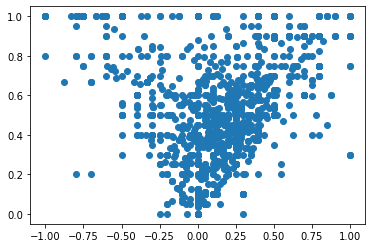

In [35]:
plt.scatter(df_clean['sentiment_polarity'], df_clean['sentiment_subjectivity'])

In [36]:
for tweet in df_clean[df_clean['sentiment_polarity']>0.5]['tweet']:
    print(tweet)

#stopthechop #savetheavenue #ClimateAction this beautiful avenue will be lost if Havant Borough Council approve the… https://t.co/A646Sgj0sO
@ClimateReality We must all keep the science in view. Always talk to people, always share good practice, come to se… https://t.co/90fIJFDW4a
Looking forward to speaking at the Clyde Climate Forest launch today. 

A huge project demonstrating the best of pa… https://t.co/JYFsaxMNhI
The conversation is #climatechange on a beautiful day @SomersetHouse for the launch of London Design Biennale.  It’… https://t.co/mZz6FVCBsX
#FrenchOpen begins in a favourable warm climate, Nadal in his element https://t.co/YaPoeisjEo
@ClimateWarrior7 To be honest, I read the sign in a sexual way.
You do wonder how many people are out there believing such nonesense. Like with climate change deniers best not to… https://t.co/LCsj8v6YAN
These look great can any of the participants support us in joining our @NTFC_CT @footballPSL Squad? #ClimateAction… https://t.co/1e4M0tS6c

In [39]:
for tweet in df_clean[df_clean['sentiment_polarity']<-0.5]['tweet']:
    print(tweet)

If you think Covid is bad just wait for the Climate Change barrage
Disappointed. We lost tonight trying to overturn a policy position made before the declarations of climate and biod… https://t.co/lStuSNMTk1
@BBCNews When will people learn. You can Not cure the Climate. Fucking idiots. !!!!
It's already bored us to tears. Climate bollocks in a vice. See you in 10 years Greta!
This! I've witnessed/experienced both. We have been talking about the climate crisis &amp; grief @climate_College on fe… https://t.co/Dcx8siLGnK
People still moving mad. 
In the climate we are in?? 
For why?!
Please dey your dey, make a dey my dey.
@BookSwapSteve Looking at the climate predictions and our very crap governmental response, I'd go milspec on those… https://t.co/qGoU2GrBHc
If that was it for the sunshine I may cry. It’s boring now. We’re all BORED of your pathetic climate UK ☔️
@ClimateWarrior7 @Scarface___1983 @Batley_MuslimCo I believe he had anger issues.
@ClimateWarrior7 It’s vaccine time, there’s

In [40]:
for tweet in df_clean[df_clean['sentiment_polarity']==0.0]['tweet']:
    print(tweet)

@ScotTories No, the climate emergency "threatens" (as you call it) the oil and gas industry therefore we need to tr… https://t.co/9dZTkjpm9Y
Sir Mark Rylance has called on the arts to help solve the climate crisis by telling stories that persuade people to… https://t.co/T9JMXvHyvS
As well as rapid and drastic cuts in greenhouse gas emissions to combat #climatechange, governments need to plan ca… https://t.co/0WaxPVXy2A
@GordonBrown What about Children living in Poverty in the UK should that not be a priority before climate change?
@tomkins_deborah @arts_river @FlashFicFest @judehwriter @pagechatter @BrisClimWrit @ClimateCultures Congratulations!
@PikeMortnoy @TeslaInTheUK If only it were that simple. It’s right-wing conservative FUD. It’s from climate change… https://t.co/oOhRFmBcNV
@PetecoleO @AAPresident @thesundaytimes It’s a Murdoch rag. His views on climate change and renewables are well kno… https://t.co/aa6UU9g1Rd
A few observations : it’s factory farming of cows, chickens, pigs

In [ ]:
df_clean['sentiment_subjectivity'].plot()

In [ ]:
for tweet_idx in np.random.randint(len(df_clean.index), size=2):
    print()
    print(tweet_data.loc[tweet_idx]['tweet'])
    print(df_clean.loc[tweet_idx]['tweet'])
    print()
    tweet = TextBlob(tweet_data['tweet'][tweet_idx])
    print(tweet.tags)
    print('____')
    print(tweet.noun_phrases)
    print('____')
    # print(tweet.sentiment_assessments)
    print('polarity: ', tweet.sentiment_assessments.polarity)
    print('subjectivity: ', tweet.sentiment_assessments.subjectivity)

    tweet = TextBlob(df_clean['tweet'][tweet_idx])
    print(tweet.tags)
    print('____')
    print(tweet.noun_phrases)
    print('____')
    print('polarity: ', tweet.sentiment_assessments.polarity)
    print('subjectivity: ', tweet.sentiment_assessments.subjectivity)
    print()

In [ ]:
tweet.noun_phrases

In [ ]:
tweet.sentiment

In [ ]:
wiki=TextBlob("Textblob is amazingly simple to use. What a great fun!")

In [ ]:
wiki.sentiment

In [ ]:
for word in wiki.sentences:
    print(word.sentiment)